In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import tensorflow.keras.backend as K
cfg = tf.compat.v1.ConfigProto()

In [18]:
hr_data=pd.read_csv("C:/Users/HP/Downloads/archive (4)/HR_comma_sep.csv")

In [19]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# EDA

In [21]:
#moving our target that is 'left' column to the end for easiness

cols = hr_data.columns.tolist()
new_position = 10

cols.insert(new_position, cols.pop(cols.index('left')))
hr_data = hr_data[cols]

In [22]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [23]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [25]:
hr_data.shape

(14999, 10)

# Data Cleaning

In [26]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

In [27]:
print("Number of duplicates : ", len(hr_data[hr_data.duplicated()]))

Number of duplicates :  3008


In [28]:
hr_data = hr_data.drop_duplicates()
print("Number of duplicates : ", len(hr_data[hr_data.duplicated()]))

Number of duplicates :  0


# Data Visualization


C:\Users\HP\AppData\Local\Temp\ipykernel_9844\2314786136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=hr_data.left, palette="Set2")


<Axes: xlabel='left', ylabel='count'>

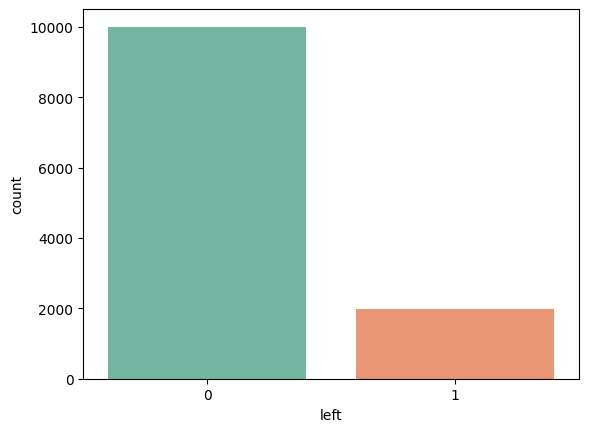

In [30]:
import seaborn as sns

sns.countplot(x=hr_data.left, palette="Set2")



<Axes: xlabel='salary', ylabel='count'>

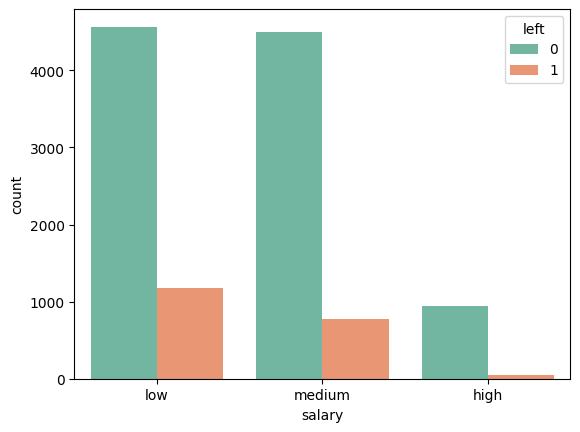

In [31]:
sns.countplot(x = 'salary' ,hue ='left' ,palette = "Set2" , data= hr_data)

<Axes: xlabel='Department', ylabel='count'>

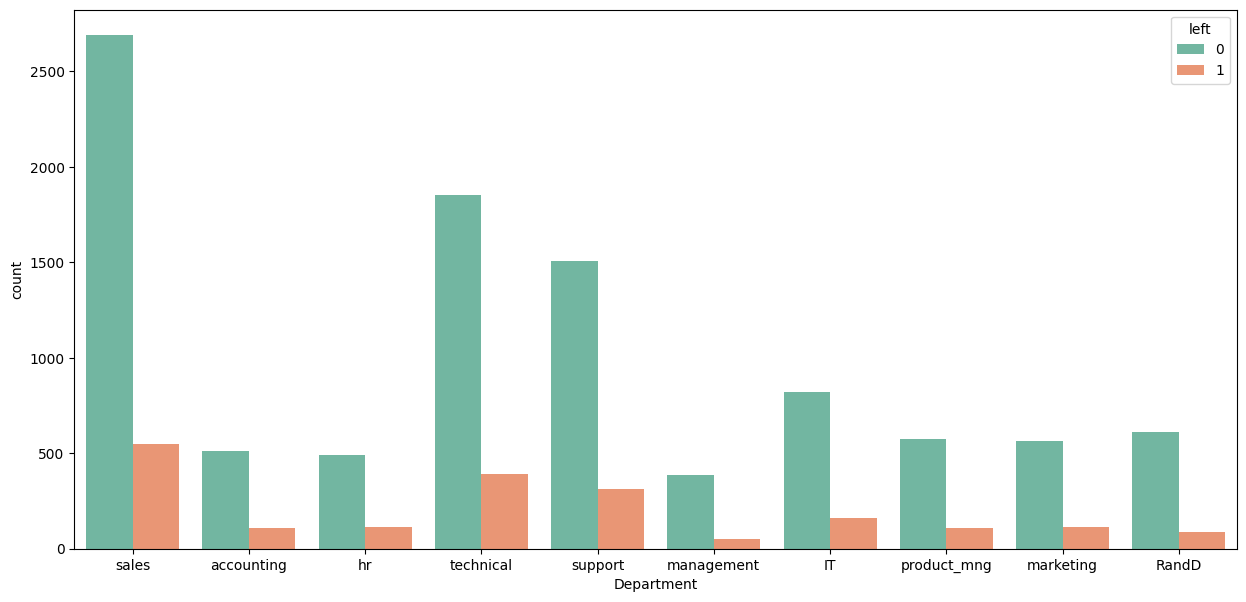

In [32]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'Department' ,hue ='left' ,palette = "Set2" , data= hr_data)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


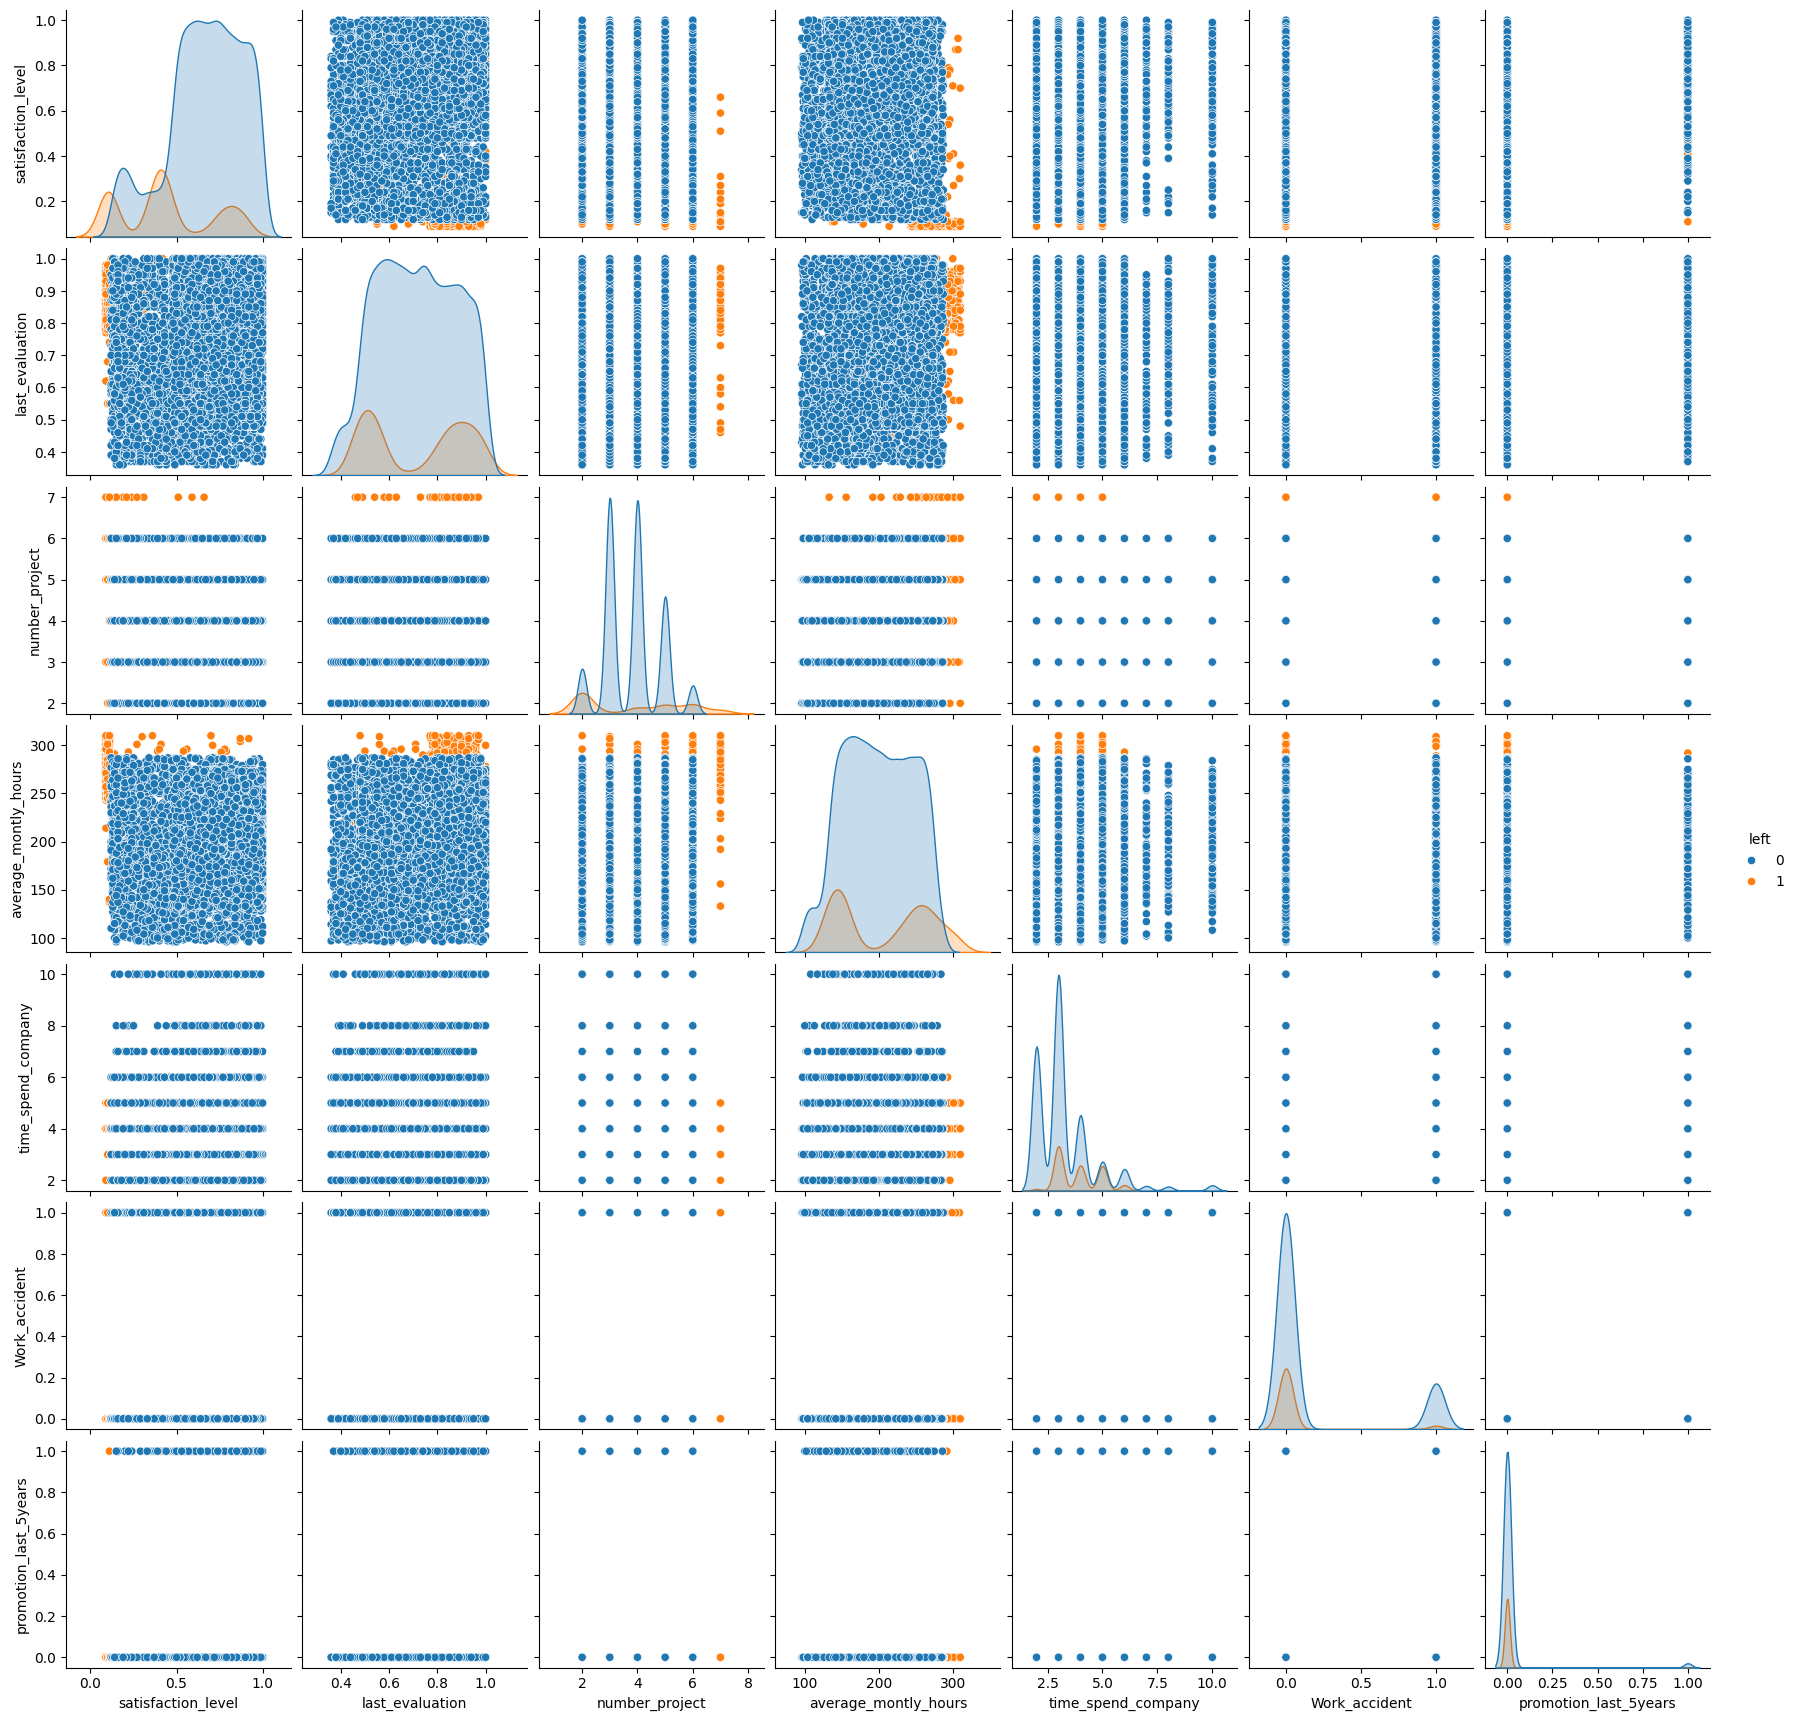

In [33]:
sns.pairplot(hr_data, hue = 'left')

<Axes: >

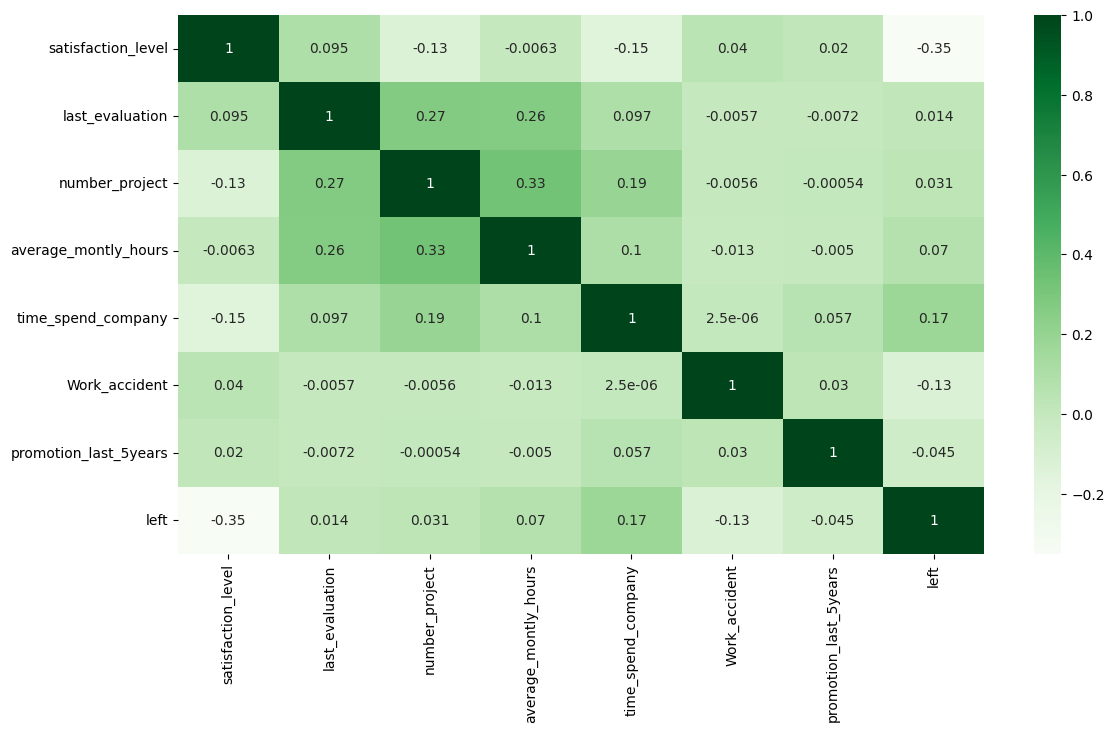

In [35]:
plt.figure(figsize=(13, 7))
sns.heatmap(hr_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='Greens')


# Data Preprocessing

In [36]:
hr_data = pd.get_dummies(hr_data, columns=['salary'])

In [37]:
X = hr_data.drop(columns = ['left', 'Department', 'Work_accident'])
y = hr_data['left']

In [38]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

# Model

In [40]:
models = {
    '        Logistic Regression': LogisticRegression(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest Classifier': RandomForestClassifier(),
}


accuracy, precision, recall = {}, {}, {}

for i in models.keys():
    
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    
    accuracy[i] = accuracy_score(y_pred, y_test)
    precision[i] = precision_score(y_pred, y_test)

In [41]:
hr_data_models = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision'])
hr_data_models['Accuracy'] = accuracy.values()
hr_data_models['Precision'] = precision.values()
hr_data_models

,Accuracy,Precision
Logistic Regression,0.827428,0.167082
Decision Tree,0.961234,0.902743
Random Forest Classifier,0.980825,0.902743


<Axes: >

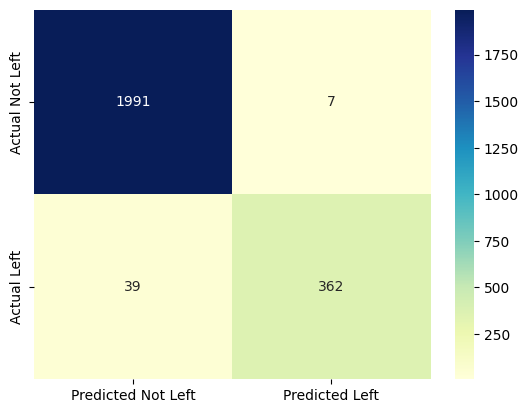

In [42]:
cm = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Not Left', 'Predicted Left'], index = ['Actual Not Left', 'Actual Left'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

In [43]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n', '\n',
        'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
        'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n', '\n',
        'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',
        'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9808253438932889 
 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9027431421446384 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9964964964964965 
 
 Positive Predictive value = TP/(TP+FP) =  0.981029810298103 
 Negative predictive Value = TN/(TN+FN) =  0.9807881773399014 



# Neural Network

In [44]:
mlp = MLPClassifier(max_iter = 500)
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)

print('The accuracy score of MLP is : ', accuracy_score(mlp_y_pred, y_test))
print('The precision score of MLP is : ', precision_score(mlp_y_pred, y_test))

The accuracy score of MLP is :  0.9720716965402251
The precision score of MLP is :  0.8902743142144638


In [49]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=32,epochs=20)
ann_y_pred = ann.predict(X_test)
ann_y_pred = (ann_y_pred>0.5)

print('The accuracy score of MLP is : ', accuracy_score(y_test, ann_y_pred))
print('The precision score of MLP is : ', precision_score(y_test, ann_y_pred))

Epoch 1/20
300/300 [==============================] - 2s 2ms/step - loss: 0.6332 - accuracy: 0.6634
Epoch 2/20
300/300 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8333
Epoch 3/20
300/300 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8339
Epoch 4/20
300/300 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.8676
Epoch 5/20
300/300 [==============================] - 1s 3ms/step - loss: 0.2164 - accuracy: 0.8959
Epoch 6/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.8987
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.1872 - accuracy: 0.9002
Epoch 8/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9018
Epoch 9/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1726 - accuracy: 0.9226
Epoch 10/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1665 - accuracy: 0.9519

# Conclusion

#### First we did some emploratory data analysis of our dataset and then did some cleaning. Later we did some preprocessing and then trained 3 Machine Learning algorithms and then 2 Neural Networks. The results showed that Random Forest Classifier has outperformed all of the models with 98 percent accuray and the model that performed very bad was logistic regression.